## Clustering on crime_data

### Hierarchical Clustering 

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
#Load data
crime_data = pd.read_csv("crime_data.csv") 

In [3]:
crime_data.head()

Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

In [4]:
#Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [5]:
#Creating Normalized dataframe considering only numerical  columns
df_norm = norm_func(crime_data.iloc[:,1:])
df_norm

Murder   Assault  UrbanPop      Rape
0   0.746988  0.654110  0.440678  0.359173
1   0.554217  0.746575  0.271186  0.961240
2   0.439759  0.852740  0.813559  0.612403
3   0.481928  0.496575  0.305085  0.315245
4   0.493976  0.791096  1.000000  0.860465
5   0.427711  0.544521  0.779661  0.811370
6   0.150602  0.222603  0.762712  0.098191
7   0.307229  0.660959  0.677966  0.219638
8   0.879518  0.993151  0.813559  0.635659
9   1.000000  0.568493  0.474576  0.478036
10  0.271084  0.003425  0.864407  0.333333
11  0.108434  0.256849  0.372881  0.178295
12  0.578313  0.698630  0.864407  0.431525
13  0.385542  0.232877  0.559322  0.354005
14  0.084337  0.037671  0.423729  0.103359
15  0.313253  0.239726  0.576271  0.276486
16  0.536145  0.219178  0.338983  0.232558
17  0.879518  0.698630  0.576271  0.385013
18  0.078313  0.130137  0.322034  0.012920
19  0.632530  0.873288  0.593220  0.529716
20  0.216867  0.356164  0.898305  0.232558
21  0.680723  0.719178  0.711864  0.718346
22  0.114458  0.092466  0.576271  0.196382
23  0.921687  0.732877  0.203390  0.253230
24  0.493976  0.455479  0.644068  0.540052
25  0.313253  0.219178  0.355932  0.235142
26  0.210843  0.195205  0.508475  0.237726
27  0.686747  0.708904  0.830508  1.000000
28  0.078313  0.041096  0.406780  0.056848
29  0.397590  0.390411  0.966102  0.297158
30  0.638554  0.821918  0.644068  0.640827
31  0.620482  0.715753  0.915254  0.485788
32  0.734940  1.000000  0.220339  0.227390
33  0.000000  0.000000  0.203390  0.000000
34  0.391566  0.256849  0.728814  0.364341
35  0.349398  0.363014  0.610169  0.328165
36  0.246988  0.390411  0.593220  0.568475
37  0.331325  0.208904  0.677966  0.196382
38  0.156627  0.441781  0.932203  0.025840
39  0.819277  0.801370  0.271186  0.392765
40  0.180723  0.140411  0.220339  0.142119
41  0.746988  0.489726  0.457627  0.506460
42  0.716867  0.534247  0.813559  0.470284
43  0.144578  0.256849  0.813559  0.403101
44  0.084337  0.010274  0.000000  0.100775
45  0.463855  0.380137  0.525424  0.346253
46  0.192771  0.342466  0.694915  0.488372
47  0.295181  0.123288  0.118644  0.051680
48  0.108434  0.027397  0.576271  0.090439
49  0.361446  0.397260  0.474576  0.214470

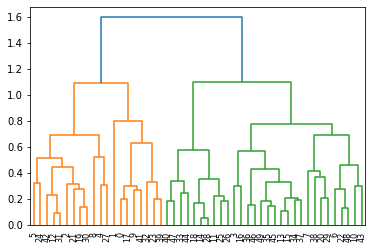

In [6]:
#create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method = 'complete'))

In [7]:
#Creating clusters
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'single')

In [8]:
y_hc = hc .fit_predict(df_norm)
Clusters = pd.DataFrame(y_hc, columns = ['Clusters'])

In [9]:
Clusters

Clusters
0          0
1          3
2          0
3          0
4          0
5          0
6          0
7          1
8          2
9          0
10         0
11         0
12         0
13         0
14         0
15         0
16         0
17         0
18         0
19         0
20         0
21         0
22         0
23         0
24         0
25         0
26         0
27         0
28         0
29         0
30         0
31         0
32         0
33         0
34         0
35         0
36         0
37         0
38         0
39         0
40         0
41         0
42         0
43         0
44         0
45         0
46         0
47         0
48         0
49         0

In [10]:
#Assign clusters to dataset
crime_data['h_clusterid']=hc.labels_
crime_data

Unnamed: 0  Murder  Assault  UrbanPop  Rape  h_clusterid
0          Alabama    13.2      236        58  21.2            0
1           Alaska    10.0      263        48  44.5            3
2          Arizona     8.1      294        80  31.0            0
3         Arkansas     8.8      190        50  19.5            0
4       California     9.0      276        91  40.6            0
5         Colorado     7.9      204        78  38.7            0
6      Connecticut     3.3      110        77  11.1            0
7         Delaware     5.9      238        72  15.8            1
8          Florida    15.4      335        80  31.9            2
9          Georgia    17.4      211        60  25.8            0
10          Hawaii     5.3       46        83  20.2            0
11           Idaho     2.6      120        54  14.2            0
12        Illinois    10.4      249        83  24.0            0
13         Indiana     7.2      113        65  21.0            0
14            Iowa     2.2       56        57  11.3            0
15          Kansas     6.0      115        66  18.0            0
16        Kentucky     9.7      109        52  16.3            0
17       Louisiana    15.4      249        66  22.2            0
18           Maine     2.1       83        51   7.8            0
19        Maryland    11.3      300        67  27.8            0
20   Massachusetts     4.4      149        85  16.3            0
21        Michigan    12.1      255        74  35.1            0
22       Minnesota     2.7       72        66  14.9            0
23     Mississippi    16.1      259        44  17.1            0
24        Missouri     9.0      178        70  28.2            0
25         Montana     6.0      109        53  16.4            0
26        Nebraska     4.3      102        62  16.5            0
27          Nevada    12.2      252        81  46.0            0
28   New Hampshire     2.1       57        56   9.5            0
29      New Jersey     7.4      159        89  18.8            0
30      New Mexico    11.4      285        70  32.1            0
31        New York    11.1      254        86  26.1            0
32  North Carolina    13.0      337        45  16.1            0
33    North Dakota     0.8       45        44   7.3            0
34            Ohio     7.3      120        75  21.4            0
35        Oklahoma     6.6      151        68  20.0            0
36          Oregon     4.9      159        67  29.3            0
37    Pennsylvania     6.3      106        72  14.9            0
38    Rhode Island     3.4      174        87   8.3            0
39  South Carolina    14.4      279        48  22.5            0
40    South Dakota     3.8       86        45  12.8            0
41       Tennessee    13.2      188        59  26.9            0
42           Texas    12.7      201        80  25.5            0
43            Utah     3.2      120        80  22.9            0
44         Vermont     2.2       48        32  11.2            0
45        Virginia     8.5      156        63  20.7            0
46      Washington     4.0      145        73  26.2            0
47   West Virginia     5.7       81        39   9.3            0
48       Wisconsin     2.6       53        66  10.8            0
49         Wyoming     6.8      161        60  15.6            0

### K-means Hierarchical Clustering 

In [11]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [12]:
#Normalizing function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
crime_scaled = scaler.fit_transform(crime_data.iloc[:,1:])

In [13]:
# How to find optimum number of cluster
# the k-means algorithm aims to choose centroids that minimize the inertia, or within clusters sum-of-squares criterion 

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


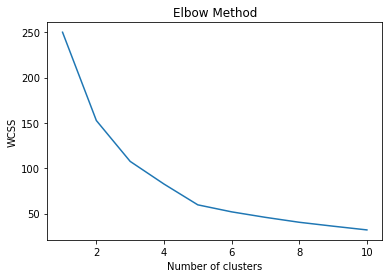

In [14]:
#Elbow curve
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,random_state=0)
    kmeans.fit(crime_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
#Building Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=55)
clusters_new.fit(df_norm)

KMeans(n_clusters=4, random_state=55)

In [16]:
clusters_new.labels_

array([1, 0, 0, 1, 0, 0, 3, 3, 0, 1, 3, 2, 0, 3, 2, 3, 2, 1, 2, 0, 3, 0,
       2, 1, 0, 2, 2, 0, 2, 3, 0, 0, 1, 2, 3, 3, 3, 3, 3, 1, 2, 1, 0, 3,
       2, 3, 3, 2, 2, 3])

In [33]:
#Assign clusters to dataset
crime_data['kclusterid'] = clusters_new.labels_

In [34]:
clusters_new.cluster_centers_

array([[0.60333642, 0.72734457, 0.74576271, 0.66905188],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408],
       [0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.29254518, 0.32148973, 0.70974576, 0.29667313]])

In [35]:
crime_data.groupby('clusterid_new').agg(['mean']).reset_index()

clusterid_new     Murder     Assault   UrbanPop       Rape h_clusterid  \
                      mean        mean       mean       mean        mean   
0             0  10.815385  257.384615  76.000000  33.192308    0.384615   
1             1  13.937500  243.625000  53.750000  21.412500    0.000000   
2             2   3.600000   78.538462  52.076923  12.176923    0.000000   
3             3   5.656250  138.875000  73.875000  18.781250    0.062500   

  kclusterid  
        mean  
0        0.0  
1        1.0  
2        2.0  
3        3.0

In [36]:
crime_data

Murder  Assault  UrbanPop  Rape  h_clusterid  clusterid_new  kclusterid
0     13.2      236        58  21.2            0              1           1
1     10.0      263        48  44.5            3              0           0
2      8.1      294        80  31.0            0              0           0
3      8.8      190        50  19.5            0              1           1
4      9.0      276        91  40.6            0              0           0
5      7.9      204        78  38.7            0              0           0
6      3.3      110        77  11.1            0              3           3
7      5.9      238        72  15.8            1              3           3
8     15.4      335        80  31.9            2              0           0
9     17.4      211        60  25.8            0              1           1
10     5.3       46        83  20.2            0              3           3
11     2.6      120        54  14.2            0              2           2
12    10.4      249        83  24.0            0              0           0
13     7.2      113        65  21.0            0              3           3
14     2.2       56        57  11.3            0              2           2
15     6.0      115        66  18.0            0              3           3
16     9.7      109        52  16.3            0              2           2
17    15.4      249        66  22.2            0              1           1
18     2.1       83        51   7.8            0              2           2
19    11.3      300        67  27.8            0              0           0
20     4.4      149        85  16.3            0              3           3
21    12.1      255        74  35.1            0              0           0
22     2.7       72        66  14.9            0              2           2
23    16.1      259        44  17.1            0              1           1
24     9.0      178        70  28.2            0              0           0
25     6.0      109        53  16.4            0              2           2
26     4.3      102        62  16.5            0              2           2
27    12.2      252        81  46.0            0              0           0
28     2.1       57        56   9.5            0              2           2
29     7.4      159        89  18.8            0              3           3
30    11.4      285        70  32.1            0              0           0
31    11.1      254        86  26.1            0              0           0
32    13.0      337        45  16.1            0              1           1
33     0.8       45        44   7.3            0              2           2
34     7.3      120        75  21.4            0              3           3
35     6.6      151        68  20.0            0              3           3
36     4.9      159        67  29.3            0              3           3
37     6.3      106        72  14.9            0              3           3
38     3.4      174        87   8.3            0              3           3
39    14.4      279        48  22.5            0              1           1
40     3.8       86        45  12.8            0              2           2
41    13.2      188        59  26.9            0              1           1
42    12.7      201        80  25.5            0              0           0
43     3.2      120        80  22.9            0              3           3
44     2.2       48        32  11.2            0              2           2
45     8.5      156        63  20.7            0              3           3
46     4.0      145        73  26.2            0              3           3
47     5.7       81        39   9.3            0              2           2
48     2.6       53        66  10.8            0              2           2
49     6.8      161        60  15.6            0              3           3

## DBSCAN

In [21]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     50 non-null     object 
 1   Murder         50 non-null     float64
 2   Assault        50 non-null     int64  
 3   UrbanPop       50 non-null     int64  
 4   Rape           50 non-null     float64
 5   h_clusterid    50 non-null     int64  
 6   clusterid_new  50 non-null     int32  
dtypes: float64(2), int32(1), int64(3), object(1)
memory usage: 2.7+ KB


In [22]:
crime_data.drop(['Unnamed: 0'],axis=1, inplace=True)

In [23]:
array = crime_data.values

In [24]:
array

array([[ 13.2, 236. ,  58. ,  21.2,   0. ,   1. ],
       [ 10. , 263. ,  48. ,  44.5,   3. ,   0. ],
       [  8.1, 294. ,  80. ,  31. ,   0. ,   0. ],
       [  8.8, 190. ,  50. ,  19.5,   0. ,   1. ],
       [  9. , 276. ,  91. ,  40.6,   0. ,   0. ],
       [  7.9, 204. ,  78. ,  38.7,   0. ,   0. ],
       [  3.3, 110. ,  77. ,  11.1,   0. ,   3. ],
       [  5.9, 238. ,  72. ,  15.8,   1. ,   3. ],
       [ 15.4, 335. ,  80. ,  31.9,   2. ,   0. ],
       [ 17.4, 211. ,  60. ,  25.8,   0. ,   1. ],
       [  5.3,  46. ,  83. ,  20.2,   0. ,   3. ],
       [  2.6, 120. ,  54. ,  14.2,   0. ,   2. ],
       [ 10.4, 249. ,  83. ,  24. ,   0. ,   0. ],
       [  7.2, 113. ,  65. ,  21. ,   0. ,   3. ],
       [  2.2,  56. ,  57. ,  11.3,   0. ,   2. ],
       [  6. , 115. ,  66. ,  18. ,   0. ,   3. ],
       [  9.7, 109. ,  52. ,  16.3,   0. ,   2. ],
       [ 15.4, 249. ,  66. ,  22.2,   0. ,   1. ],
       [  2.1,  83. ,  51. ,   7.8,   0. ,   2. ],
       [ 11.3, 300. ,  67. ,  2

In [25]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [26]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [27]:
X

array([[ 1.25517927e+00,  7.90787158e-01, -5.26195142e-01,
        -3.45115891e-03, -2.32845158e-01, -5.42762825e-01],
       [ 5.13018579e-01,  1.11805959e+00, -1.22406668e+00,
         2.50942392e+00,  5.58828379e+00, -1.39082974e+00],
       [ 7.23606675e-02,  1.49381682e+00,  1.00912225e+00,
         1.05346626e+00, -2.32845158e-01, -1.39082974e+00],
       [ 2.34708319e-01,  2.33211909e-01, -1.08449238e+00,
        -1.86793976e-01, -2.32845158e-01, -5.42762825e-01],
       [ 2.81093362e-01,  1.27563520e+00,  1.77678094e+00,
         2.08881393e+00, -2.32845158e-01, -1.39082974e+00],
       [ 2.59756242e-02,  4.02908724e-01,  8.69547941e-01,
         1.88390137e+00, -2.32845158e-01, -1.39082974e+00],
       [-1.04088037e+00, -7.36484178e-01,  7.99760786e-01,
        -1.09272319e+00, -2.32845158e-01,  1.15337100e+00],
       [-4.37874809e-01,  8.15029561e-01,  4.50825016e-01,
        -5.85834225e-01,  1.70753116e+00,  1.15337100e+00],
       [ 1.76541475e+00,  1.99078607e+00,  1.009

In [28]:
#Build model
dbscan = DBSCAN(eps=2, min_samples = 5)
dbscan.fit(X)

DBSCAN(eps=2)

In [29]:
#Noisy samples are given the label -1
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [30]:
c1 = pd.DataFrame(dbscan.labels_,columns =['cluster'])

In [31]:
c1

cluster
0         0
1        -1
2         0
3         0
4         0
5         0
6         0
7        -1
8        -1
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
30        0
31        0
32        0
33        0
34        0
35        0
36        0
37        0
38        0
39        0
40        0
41        0
42        0
43        0
44        0
45        0
46        0
47        0
48        0
49        0

In [32]:
pd.concat([crime_data,c1],axis=1)

Murder  Assault  UrbanPop  Rape  h_clusterid  clusterid_new  cluster
0     13.2      236        58  21.2            0              1        0
1     10.0      263        48  44.5            3              0       -1
2      8.1      294        80  31.0            0              0        0
3      8.8      190        50  19.5            0              1        0
4      9.0      276        91  40.6            0              0        0
5      7.9      204        78  38.7            0              0        0
6      3.3      110        77  11.1            0              3        0
7      5.9      238        72  15.8            1              3       -1
8     15.4      335        80  31.9            2              0       -1
9     17.4      211        60  25.8            0              1        0
10     5.3       46        83  20.2            0              3        0
11     2.6      120        54  14.2            0              2        0
12    10.4      249        83  24.0            0              0        0
13     7.2      113        65  21.0            0              3        0
14     2.2       56        57  11.3            0              2        0
15     6.0      115        66  18.0            0              3        0
16     9.7      109        52  16.3            0              2        0
17    15.4      249        66  22.2            0              1        0
18     2.1       83        51   7.8            0              2        0
19    11.3      300        67  27.8            0              0        0
20     4.4      149        85  16.3            0              3        0
21    12.1      255        74  35.1            0              0        0
22     2.7       72        66  14.9            0              2        0
23    16.1      259        44  17.1            0              1        0
24     9.0      178        70  28.2            0              0        0
25     6.0      109        53  16.4            0              2        0
26     4.3      102        62  16.5            0              2        0
27    12.2      252        81  46.0            0              0        0
28     2.1       57        56   9.5            0              2        0
29     7.4      159        89  18.8            0              3        0
30    11.4      285        70  32.1            0              0        0
31    11.1      254        86  26.1            0              0        0
32    13.0      337        45  16.1            0              1        0
33     0.8       45        44   7.3            0              2        0
34     7.3      120        75  21.4            0              3        0
35     6.6      151        68  20.0            0              3        0
36     4.9      159        67  29.3            0              3        0
37     6.3      106        72  14.9            0              3        0
38     3.4      174        87   8.3            0              3        0
39    14.4      279        48  22.5            0              1        0
40     3.8       86        45  12.8            0              2        0
41    13.2      188        59  26.9            0              1        0
42    12.7      201        80  25.5            0              0        0
43     3.2      120        80  22.9            0              3        0
44     2.2       48        32  11.2            0              2        0
45     8.5      156        63  20.7            0              3        0
46     4.0      145        73  26.2            0              3        0
47     5.7       81        39   9.3            0              2        0
48     2.6       53        66  10.8            0              2        0
49     6.8      161        60  15.6            0              3        0